# Objets connectés

Les objets connectés, [des robots dans nos maisons](http://lienmini.fr/3389-701) ?

L'impact de la robotisation [dans les magasins](http://lienmini.fr/3389-707)

Question déclencheante : *" Si on dispose d'un employé et d'un robot. Faut il confier une tâche répétitive et fastidieuse à l'un ou à l'autre pour qu'elle soit correctement réalisée ? "*

Nous allons parler d'un certain type de robot appelés : les systèmes embarqués, en anglais on parle de *Embedded Hardware* . Les connaissances de technologies vue au colège sur la fabrication de robots est un prérequis pour comprendre ce cours.

Comment utiliser un microcontrôleur pour automatiser une tâche de caractérisation répétitive ? Dans le cas d’une série de résistors, le tracé de la droite caractéristique de la Tension (en V) en fonction du Courant (en A) est une tâche est particulièrement fastidieuse. En fait le plus pénible est la lecture des données fluctuantes qui apparaîssent sur les ecrans des multimètres. On admetra qu'il sera presque impossible de la reproduire à l’identique des données expérimentale en changeant le manipulateur, par contre un robot testeur peut être conçu pour relever le défi et permettre l'acquisition rapide et automatisée d'un très grand nombre de variables.

## A) Géneralités

## 1) Les systèmes informatiques embarqués

Un système informatique embarqué est intégré à un objet. Il contrôle les entrées et les sorties de celui-ci grâce à ses composants, dont les principaux sont :
- La carte programmable
- Les capteurs
- Les actionneurs
Il est destiné à piloter l'objet à distance (en faisant remonter des informations sur le cloud) ou de manière autonome (grâce à des algorithmes qui permettent à son système de contrôle de s'orienter vers des objectifs programmés). 

Lorsqu'un système informatique embarqué échange des données avec un ordinateur on parle d'**objet connecté**.

Le smartphone est un exemple d'un tel objet. 

## 2) La programmation d'un système infomatique embarqué

Pour programmer un système informatique embarqué, on doit organiser la tâche à accomplir sous forme d'un **algorithme**. C'est une suite d'instructions qui comprends notament des **fonctions** spécifiques aux capteurs et actionneurs. On ecrit un **programme** dans un langage qui puisse être interprété par le système.

Pour l'execution de celui-ci il faut le **téléverser** dans le système à travers un **port** de communication. On parle aussi de `flashage` du logiciel pilote pour décrire cette étape d'implémentation.

Dans ce cours nous allons voire quelques éléments de codage qui seront utiles pour interpéter un programme de contrôle.

On va d'abord s'intéresser aux **fonctions** puis on vera un exemple d'**algorithme** et finallement nous rentrerons dans le **programme** du microcontroleur.

### Première introduction aux fonctions en langage python

Une fonction est un outil de programmation qui permet de transformer des donnée en entrée (appelés arguments) par des résultats en sortie. Sa syntaxe est très formelle : 

~~~python
def NOM_DE_LA_FONCTION (argument1):
    return resultat
~~~

Notez bien les deux points après la déclaration de l'argument, ainsi que l'indentation (l'espace au début de la ligne où se trouve la commande 
~~~python
    return
~~~
qui renvoie le produit de la fonction. On renvoie au notebook spécifique sur l'utilisation des fonctions avec python : *informatique_embarquee_INTRO_FONCTIONS-DILLMANN.ipynb* qui présente des exemples de fonctions.

## 3) L'interface homme-machine

Les programmes à téléverser sont des codes écris dans un langage de haut niveau (le `C++`) qui doit être *compilé* par un EDI (un **Environement de Développement Intégre**)

La suite d'instructions d'un logiciel de programation est appellée à être "compilée" ce qui veut dire transformée en un langage adapté à la machine avant d'être téleversée sur la machine elle même en language machine.

Le transfert des données fait appel à la notion de *Binary Digit* que l'on peut ecrire **BI**nary digi**T** : ou plus simplement  **BIT** , un mot valise qu'il faut absolument connaître pour comprendre le fonctionnement des programmes. Désormais nous utiliserons le mot "bit" pour caractériser la plus petite unité d'information qui puisse être transmise à un ordinateur.

Dès que le programme a été compilé de façon satisfesante, il doit être implémenté sur le microcontroleur. On appelle cette opération l'étape de *téeversement*. Il est indispensable que la liaison entre l'ordinateur ou se trouve l'EDI et la carte soit correctement pilotée.

### 3.1) La programmation d'un système de type Arduino (lecture d'un port analogique)

L'exemple suivant est extrait de la bibliothèque des exemples de base et permet de lire la valeur d'une résistance dans un potentiomètre.

La programmation de l'arduino se fait en langage `C++`, qui a de nombreux points de différence avec le langage Python. Mais à notre niveau c'est pratiquement la même chose :

~~~ cpp
void setup() {
  
  Serial.begin(115200); // 1
}

// la fonction suivante est destinée à être executé en permanence
void loop() {
  
  int sensorValue = analogRead(A0); // 2
  
  Serial.println(sensorValue); // 3
  
  delay(1);        // Attends 1 seconde pour des raisons de stabilité
}
~~~

Ce code peut être téleversé tel quel dans l'IDE Arduino 

Replace les commentaires du code `C++` dans le bon ordre en te servant des flèches haut et bas du notebook

Commentaire portant sur l'opération à réaliser sur la valeur acquise par le port de communication spécifique :

~~~cpp
// imprimer la valeur qui est lue :
~~~

Commentaire portant sur la mise en place (setup) d'un protocole de communication :

~~~cpp
// initialise le port de communication serie a 115200 bits par seconde
~~~

Commentaire portant sur la déclaration de la borne de communication destinée à recevoir un signal :

~~~cpp
// Lis la valeur du port analogique qui se trouve au pin 0 :
~~~

On retrouve deux sortes de fonctions principales :

~~~ c
void setup() 
void loop()
~~~

La première définit la vitesse à laquelle les bits vont être envoyés quant à la deuxième elle constitue le coeur du programme puis-ce que c'est elle qui demande la lecture du signal qui se trouve sur le pin 0, grâce à la fonction `analogRead()` et qui imprime dans la console série le résultat grâce à une autre fonction `Serial.println()`.



### 3.2) La programmation d'un système de type Arduino (géneration d'un signal)

Dans le programme suivant on va voire comment utiliser une des sortie digitales qui se trouve alignées avec le bouton 'réset'. Ces sorties ne doivent **jamais** être reliées de l'une à l'autre sous peine de détruire la platinne. 


~~~cpp
/*

    Gradateur de lumière

           Cet exemple montre comment estomper progressivement la lueur d'une LED sur la broche 9 en utilisant la fonction :  
           
           analogWrite()
  
  Description de la fonction.

  La fonction analogWrite() utilise PWM (Impulsion modulée en amplitude), donc si vous voulez changer la broche en utilisant une autre carte, assurez-vous d'utiliser une autre broche compatible PWM. 
 
  Sur la plupart des Arduino, les broches PWM sont identifiés par un signe "~", 
  comme ~3, ~5, ~6, ~9, ~10 et ~11.
  
  Dans la carte PlugUino la tilde à disparut mais le pins D10 est PWM on pourra vérifier que les autres sont bien ajustables

  Cet example appartient au domaîne publique
  
  http://www.arduino.cc/en/Tutorial/Fade
*/

int led = 9;           // déclaration du pin "PWM" qui alimente la DEL
int brightness = 0;    // niveau de luminosité de la DEL
int fadeAmount = 5;    // combien d'etapes de variation pour la DEL

// la routine de configuration s'exécute une fois lorsque vous appuyez sur reset :
void setup() {
  // déclare que la broche 9 est une sortie :
  pinMode(led, OUTPUT);
}

// la routine de la boucle se répète encore et encore, pour toujours :
void loop() {
  // régler la luminosité de la broche 9 :
  analogWrite(led, brightness);

  // modifier la luminosité pour la prochaine fois à travers la boucle :
  brightness = brightness + fadeAmount;

  // inverser le sens du fondu lumineux une fois que l'on est parvennu aux extrémités :
  if (brightness <= 0 || brightness >= 255) {
    fadeAmount = -fadeAmount;
  }
  // attendre 30 millisecondes pour voir l'effet de gradation
  delay(30);
}
~~~

Nous avons les deux éléments qui vont nous permettre de faire notre propre robot de caractérisation de dipôles


## B) Application : Le robot caracteriseur de dipôles

Nous allons nous intéresser à un type d'automate très courant dans les équipes de recherche et développement dans lesquelles on prépare la conception de nouveaux composants. On appelle cela des "[Flying Probes](https://youtu.be/syQDnRmdhmA)". 

La tension $U_{AB}$ aux bornes du dipôle est une fonction de la variable intensité $I$ qui le traverse : $U_{AB}= f (I)$.
La caractéristique tension-courant d'un dipôle est la courbe représentative de $f$ avec $I$ en abscisse et $U_{AB}$ en ordonnée.

Dans ce cas :
- La carte programmable est de type Arduino (ou assimilé)
- L'actionneur est un signal de tension, triangulaire allant de $0\,V$ à presque $5\,V$
- Les capteurs sont les tensions mesurées de part et d'autre d'un dipôle à caractériser

## 1) Situation de départ : Quelle démarche suivre pour tracer la caractéristique d'un dipôle avec des multimètres ?

On s'intéresse d'abord à la démarche "artisanalle" qui consiste à relever pour différentes tensions d'un générateur à tension variable l'intensité $I$ et la tension $U_{AB}$ que l'on reporte dans un tableau.

Le montage correspond à ce qui a été vu en classe de 4ème : 

<p><img src="circuit_4eme1.png" alt="Schéma simplifié" /></p>


L'énnoncé de l'exercice résolu au collège est :

"Tracez la caractéristique tension-courant de la résistance étudiée. Sur du papier milimètré (ou mieux : reportez les valeurs d'un tableau dans un logiciel de tracé graphique si vous savez vous en servir) et identifiez le modèle physique qui permet de représenter la distribution des couples de points."

	
Le montage que vous devez réaliser pour étudier le comportement
de la résistance est représenté ci-dessus.

Il semble être compliqué. Dans la pratique, il est assez simple.

Il utilise un ampèremètre branché en série avec un générateur variable et un voltmètre placé en dérivation aux bornes de la résistance.

Expérimentalement, on observe que quand on augmente la tension en volt à la sortie du générateur variable, la tension aux bornes de la résistance est liée à l'intensité du courant $i_r$ circulant dans le résistor.
    
La différence de potentiel $U_R$ exprimée en volts et l'intensité du courant $i_R$ electrique exprimée en ampères sont proportionnelles.

Grâce à la loi d'Ohm : $$ U_R = R \times i_r $$  il est possible de modéliser la relation entre la tension aux bornes d'un résistor et le courant qui le traverse, on peut de plus "ajuster" une valeur de la résistance : c'est à dire trouver le paramètre le plus juste, d'une résistance, pour qu'une droite $U=R \times I$ simulée avec une résistance calculée, resemble le plus possible à la droite passant par les valeurs expérimentales. Si l'ajustement est réussit ont peut montrer que la résistance calculée correspond à la résistance mesurée pour le résistor.

## 2) Explicitation de la démarche

La methode qui permet de caractériser un résistor par la valeur de sa résistance (en $\Omega$) fait appel à la loi d'Ohm qui modélise correctement ce comportement.

### 2.1) Un premier 'algorigramme'

In [1]:
# On utilise la fonction Digraph du module graphviz 
#qui est disponible sur  www.kaggle.com, 
# et sûrement aussi sur le serveur local
# sur tous les autres intérpréteurs il faut demander
# la permission d'installer un module spécifique

from graphviz import Digraph

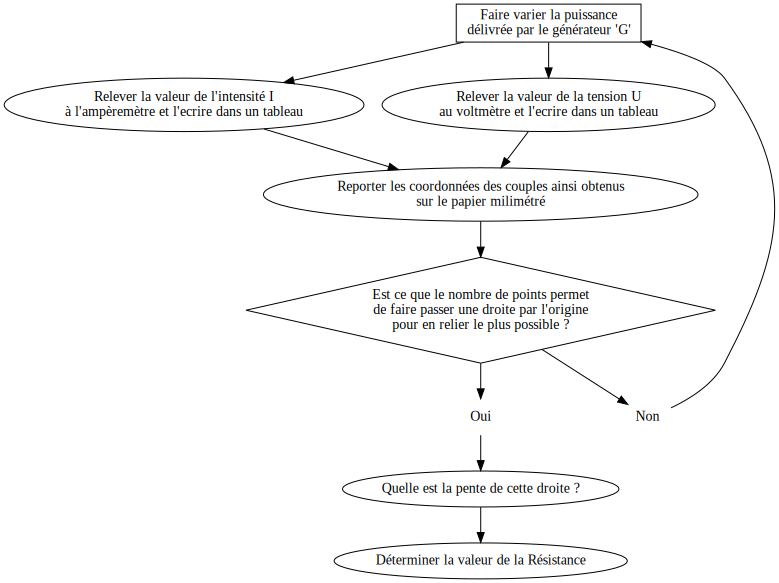

In [7]:
dot = Digraph(comment='Algorigramme')
#G1=pgv.AGraph(strict=False,directed=True)

################## Définition des noeuds de l'algorigramme :

dot.node('A',"Faire varier la puissance \n délivrée par le générateur 'G' ",shape='rectangle')
#A = "Augmenter un peu la  du générateur 'G' "


dot.node('B1',"Relever la valeur de l'intensité I \n à l'ampèremètre et l'ecrire dans un tableau")
#B1 = "Relever la valeur de l'intensité I \n à l'ampèremètre et l'ecrire dans un tableau"

dot.node('B2',"Relever la valeur de la tension U \n au voltmètre et l'ecrire dans un tableau" )
#B2 = "Relever la valeur de la tension U \n au voltmètre et l'ecrire dans un tableau"

dot.node('C',"Reporter les coordonnées des couples ainsi obtenus \n sur le papier milimétré")
#C = "Reporter les coordonnées des couples ainsi obtenus \n sur le papier milimétré"

# Réécrire la condition C pour remplacer le papier milimétré par un tableur graphqiue de votre choix

dot.node('DECISION',"Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?",shape='diamond')
#DECISION = "Est ce que le nombre de points permet \n de faire passer une droite par l'origine \n pour en relier le plus possible ?"

dot.node('Q',"Quelle est la pente de cette droite ?")
#Q = "Quelle est la pente de cette droite ?"

dot.node('CONCLUSION',"Déterminer la valeur de la Résistance")
#CONCLUSION = "Déterminer la valeur de la Résistance"

dot.node('YES',"Oui",color='white')
#YES = "Oui"

dot.node('NO',"Non",color='white')
#NO = "Non"

######## Définition des liens entre différentes étapes de l'algorigramme : :

dot.edge('A','B1')
dot.edge('A','B2')
dot.edge('B1','C')
dot.edge('B2','C')
dot.edge('C','DECISION')
dot.edge('DECISION','YES')
dot.edge('DECISION','NO')
dot.edge('NO','A')
dot.edge('YES','Q')

dot.edge('Q','CONCLUSION')

dot

### 2.2) Mise en place d'un circuit plus réaliste 

Avant de passer à la section suivante on va modifier un peu la disposition des élements du
montage vu auparavant, et surtout introduire la notion de masse, comme la référence du potentiel qui n'a pas été présentée au collège :

<p><img src="./circuit_4eme2.png" alt="Schéma simplifié" /></p>

Dans ce deuxième schéma les composants ont été redistribués, mais ils accomplissent exactement les mêmes fonctions. On notera qu'il n'y a pas de courant qui entre dans la branche du voltmètre, du fait de la valeur de la résistance de celui-ci qui est toujours plus importante que celle de $R$. La loi d'additivité des intensités s'applique et l'intensité du courant est la même dans le résistor et dans l'ampèremètre.

On remarque aussi que $E_v$ est un générateur variable qui alimente des résistors en série (Celle de $R$ et celle de l'ampèrmètre qui est toujours négligeable devant celle de $R$). En fait nous ne disposons pas toujours d'un tel générateur, or il est vraiment indispensable pour la caractérisation de la résistance par une fonction $U=f(I)$ .


Pour mimer un générateur variable de tension continnue, on se sert d'une technique qui permet de transformer la serie d'impulsions binaires (tension maximale ou nulle) se répettant sur chaque cycle, en une tension continnue, dite pseudo-analogique. 

C'est la méthode **MLI** pour Modulation de largeur d'impulsion, on joue sur le rapport de la durée du niveau haut par la période du cycle appellée *rapport cyclique*. Plus ce rapport est élevé plus la tension fournie est proche de la tension maximale.

Exercice : Trouvez un lien qui décrive cette technique aussi appelée *Pulse Width Modulation* (PWM) et incorporez-le à cette cellule